# **STEP 1: CLONE THE REPOSITORY**

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

fatal: destination path 'pytorch-CycleGAN-and-pix2pix' already exists and is not an empty directory.


# **STEP 2: INSTALL DEPENDENCIES**

In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [3]:
!pip install -r requirements.txt

# **STEP 3: DOWNLOAD DATASET**

In [4]:
!bash ./datasets/download_pix2pix_dataset.sh facades

Specified [facades]
for details.

--2024-07-10 06:47:31--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘./datasets/facades.tar.gz’

./datasets/facades. 100%[===================>]  28.77M  4.58MB/s    in 8.9s    

2024-07-10 06:47:40 (3.22 MB/s) - ‘./datasets/facades.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/1

# **STEP 4: DOWNLOAD PRETRAINED MODEL**

In [5]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2024-07-10 06:47:41--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>] 207.62M  66.0MB/s    in 3.8s    

2024-07-10 06:47:44 (54.8 MB/s) - ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’ saved [217704720/217704720]



# **STEP 5: TRAIN THE MODEL**

In [6]:
!python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA --display_id -1

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest          

# **STEP 6: TEST THE MODEL**

In [7]:
!ls checkpoints/

facades_label2photo_pretrained	facades_pix2pix


# **STEP 7: LIST CHECKPOINTS**

In [11]:
!python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_label2photo_pretrained --use_wandb

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

# **STEP 8: VISUALIZE THE RESULTS**

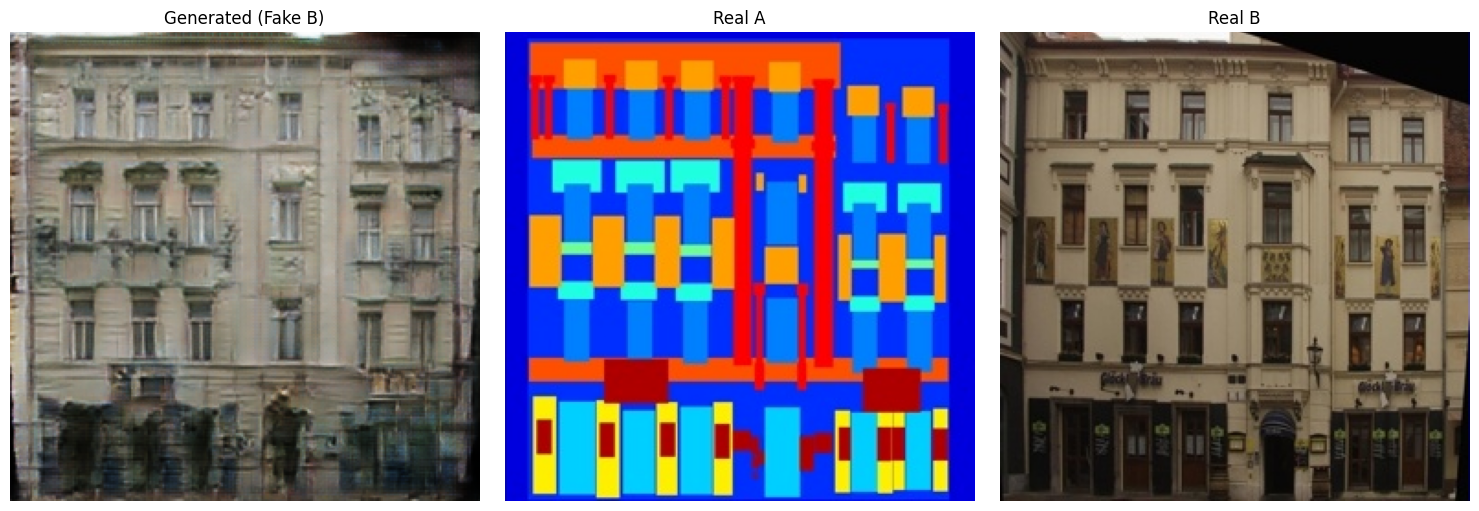

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [38]:
!pip install gradio
import gradio as gr
import matplotlib.pyplot as plt

# Load images
fake_B_path = '/content/pytorch-CycleGAN-and-pix2pix/results/facades_label2photo_pretrained/test_latest/images/100_fake_B.png'
real_A_path = '/content/pytorch-CycleGAN-and-pix2pix/results/facades_label2photo_pretrained/test_latest/images/100_real_A.png'
real_B_path = '/content/pytorch-CycleGAN-and-pix2pix/results/facades_label2photo_pretrained/test_latest/images/100_real_B.png'

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display fake B
img_fake_B = plt.imread(fake_B_path)
axes[0].imshow(img_fake_B)
axes[0].set_title('Generated (Fake B)')
axes[0].axis('off')

# Display real A
img_real_A = plt.imread(real_A_path)
axes[1].imshow(img_real_A)
axes[1].set_title('Real A')
axes[1].axis('off')

# Display real B
img_real_B = plt.imread(real_B_path)
axes[2].imshow(img_real_B)
axes[2].set_title('Real B')
axes[2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


def generate_and_display_image():
    fake_B_path = '/content/pytorch-CycleGAN-and-pix2pix/results/facades_label2photo_pretrained/test_latest/images/100_fake_B.png'
    real_A_path = '/content/pytorch-CycleGAN-and-pix2pix/results/facades_label2photo_pretrained/test_latest/images/100_real_A.png'
    real_B_path = '/content/pytorch-CycleGAN-and-pix2pix/results/facades_label2photo_pretrained/test_latest/images/100_real_B.png'

    # Correct the indentation here
    img_fake_B = plt.imread(fake_B_path)
    img_real_A = plt.imread(real_A_path)
    img_real_B = plt.imread(real_B_path)

    # Save images temporarily
    plt.imsave('temp_fake_B.png', img_fake_B)
    plt.imsave('temp_real_A.png', img_real_A)
    plt.imsave('temp_real_B.png', img_real_B)

    return 'temp_fake_B.png', 'temp_real_A.png', 'temp_real_B.png'

with gr.Blocks() as demo:
    gr.Markdown("## Pix2Pix Image Generation")
    with gr.Row():
        gen_image = gr.Image(label="Generated Image (Fake B)")
        input_image = gr.Image(label="Input Image (Real A)")
        real_image = gr.Image(label="Real Image (Real B)")

    demo.load(fn=generate_and_display_image, inputs=None, outputs=[gen_image, input_image, real_image])

demo.launch()

